In [17]:
def give_me_df(ticker): # ticker -- 'FB'
    import yfinance as yf
    stock = yf.Ticker(ticker) 
    df = stock.history(period='max')
    df[ticker] = df.Close.pct_change() # 일일 수익률
    return df[[ticker]].iloc[1:]

In [18]:
df = give_me_df('FB')
df

,FB
Date,
2012-05-21,-0.109861
2012-05-22,-0.089039
2012-05-23,0.032258
2012-05-24,0.032188
2012-05-25,-0.033909
...,...
2020-09-29,0.019352
2020-09-30,0.000420
2020-10-01,0.018060


In [19]:
dg = give_me_df('SPY')
dg

,SPY
Date,
1993-02-01,0.007285
1993-02-02,0.001903
1993-02-03,0.010638
1993-02-04,0.004135
1993-02-05,-0.000749
...,...
2020-09-29,-0.005446
2020-09-30,0.007582
2020-10-01,0.006420


In [20]:
dh = df.join(dg, how='inner')
dh

,FB,SPY
Date,,
2012-05-21,-0.109861,0.017262
2012-05-22,-0.089039,0.001706
2012-05-23,0.032258,0.000538
2012-05-24,0.032188,0.001971
2012-05-25,-0.033909,-0.003219
...,...,...
2020-09-29,0.019352,-0.005446
2020-09-30,0.000420,0.007582
2020-10-01,0.018060,0.006420


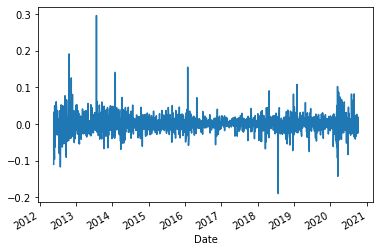

In [21]:
dh.FB.plot()

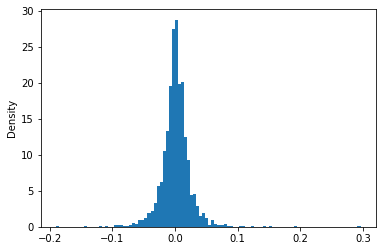

In [29]:
import matplotlib.pyplot as plt
dh.FB.plot(kind='hist', bins=100, density=True)
plt.ylabel('Density')
plt.show()

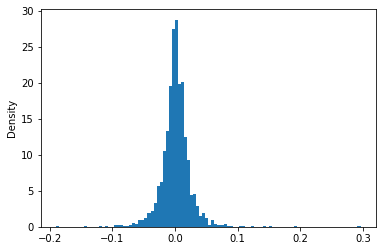

In [30]:
import matplotlib.pyplot as plt
plt.hist(dh.FB, bins=100, density=True)
plt.ylabel('Density')
plt.show()

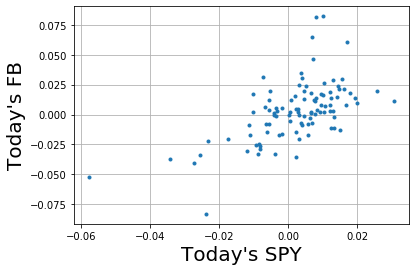

[[1.        0.5961157]
 [0.5961157 1.       ]]


In [52]:
import matplotlib.pyplot as plt
plt.plot(dh.SPY[-100:], dh.FB[-100:], '.')
plt.xlabel("Today's SPY", fontsize=20)
plt.ylabel("Today's FB", fontsize=20)
plt.grid()
plt.show()

import numpy as np
print(np.corrcoef(dh.SPY[-100:], dh.FB[-100:]))

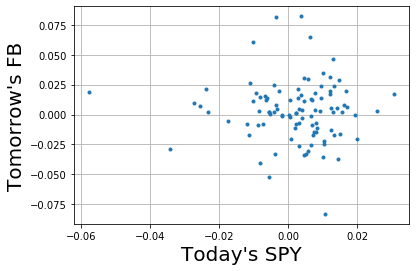

[[ 1.         -0.04300105]
 [-0.04300105  1.        ]]


In [53]:
import matplotlib.pyplot as plt
plt.plot(dh.SPY[-100:-1], dh.FB[-99:], '.')
plt.xlabel("Today's SPY", fontsize=20)
plt.ylabel("Tomorrow's FB", fontsize=20)
plt.grid()
plt.show()

import numpy as np
print(np.corrcoef(dh.SPY[-100:-1], dh.FB[-99:]))

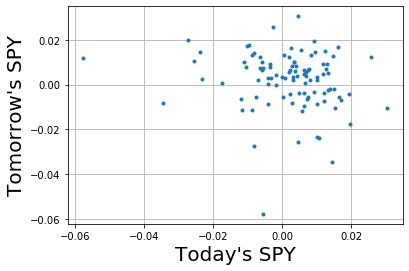

[[ 1.         -0.15615541]
 [-0.15615541  1.        ]]


In [54]:
import matplotlib.pyplot as plt
plt.plot(dh.SPY[-100:-1], dh.SPY[-99:], '.')
plt.xlabel("Today's SPY", fontsize=20)
plt.ylabel("Tomorrow's SPY", fontsize=20)
plt.grid()
plt.show()

import numpy as np
print(np.corrcoef(dh.SPY[-100:-1], dh.SPY[-99:]))